## 一、决策树：ID3

## 1、读取西瓜集ex4.csv

In [1]:
from pandas import read_csv
df = read_csv("ex4.csv",header=None)
data = df.values
X = data[:,:-1]
y = data[:,-1]
names_chinese = ['色泽','根蒂','敲声','纹理','脐部','触感']
names_english = ['color','root','sound','texture','navel','feeling']
label_chinese = ['好瓜','坏瓜']
label_english = ['good','bad']

## 2、信息熵

In [2]:
import numpy as np
def calEntropy(y):
    classes = np.unique(y)
    Ent = 0
    for c in classes:
        pc = len(y[y==c])/len(y)
        Ent = Ent - pc*np.log2(pc)
    return Ent

In [3]:
calEntropy(y)

0.9975025463691153

## 3、信息增益

In [4]:
def calInfoGain(X,y,index):
    EntD = calEntropy(y) #划分前的信息熵
    EntDv = 0
    for v in np.unique(X[:,index]):
        y_index = y[X[:,index]==v]
        EntDv = EntDv + len(y_index)/len(y)*calEntropy(y_index)
    gain = EntD - EntDv
    return gain       

In [5]:
calInfoGain(X,y,1)

0.14267495956679288

## 4、最优属性选择

In [6]:
def getBestFeature(X,y):
    maxGain = 0
    bestFeature = 0
    for i in range(X.shape[1]):
        Ent = calInfoGain(X,y,i)
        if Ent>maxGain:
            maxGain = Ent
            bestFeature = i
    return bestFeature

In [7]:
names_chinese[getBestFeature(X,y)]

'纹理'

## 5、统计样本中最多的类别

In [8]:
def maxLabel(y):
    vote = {}
    classes = np.unique(y)
    for c in classes:
        vote[c] = len(y[y==c])
    items = list(vote.items())
    items.sort(key=lambda x:x[1], reverse=True) 
    return items[0][0]

In [9]:
maxLabel(y)

1

## 6.1训练：构造决策树，结果利用字典表示(用属性序号)

In [10]:
def createTree_index(X,y):
    if len(np.unique(y))==1:
        return y[0]
    elif X.shape[1]==0 or len(np.unique(X,axis=0))==1:
        return maxLabel(y)
    else:
        bestFeature = getBestFeature(X,y)
        tree = {bestFeature:{}}
        for v in np.unique(X[:,bestFeature]):
            sub_X = X[X[:,bestFeature]==v]
            sub_y = y[X[:,bestFeature]==v]
            if len(sub_X)==0:
                tree[bestFeature][v]=maxLabel[y]
            else:
                tree[bestFeature][v]=createTree_index(sub_X,sub_y)
    return tree  

In [11]:
createTree_index(X,y)

{3: {0: {1: {0: 0, 1: {0: {0: 0, 1: {5: {0: 0, 1: 1}}}}, 2: 1}},
  1: {5: {0: 1, 1: 0}},
  2: 1}}

## 6.2训练：构造决策树，结果利用字典表示(用属性名字)

In [12]:
def createTree(X,y):
    if len(np.unique(y))==1:
        return label_english[y[0]]
    elif X.shape[1]==0 or len(np.unique(X,axis=0))==1:
        return label_english[maxLabel(y)]
    else:
        bestFeature = getBestFeature(X,y)
        tree = {names_english[bestFeature]:{}}
        for v in np.unique(X[:,bestFeature]):
            sub_X = X[X[:,bestFeature]==v]
            sub_y = y[X[:,bestFeature]==v]
            if len(sub_X)==0:
                tree[names_english[bestFeature]][v]=label_chinese[maxLabel[y]]
            else:
                tree[names_english[bestFeature]][v]=createTree(sub_X,sub_y)
    return tree               

In [13]:
d = createTree(X,y)
d

{'texture': {0: {'root': {0: 'good',
    1: {'color': {0: 'good', 1: {'feeling': {0: 'good', 1: 'bad'}}}},
    2: 'bad'}},
  1: {'feeling': {0: 'bad', 1: 'good'}},
  2: 'bad'}}

In [14]:
c = {'relationship':{0:'no',1:{'male':{0:'no',1:{'character':{0:'no',1:'yes'}}}},2:'yes'}}

## 7、决策树可视化：网络代码，通过得到的字典构造树形结构

In [15]:
import matplotlib.pyplot as plt
#定义判断结点形状,其中boxstyle表示文本框类型,fc指的是注释框颜色的深度
decisionNode = dict(boxstyle="round4", color='r', fc='2')
#定义叶结点形状
leafNode = dict(boxstyle="circle", color='m',fc='2')
#定义父节点指向子节点或叶子的箭头形状
arrow_args = dict(arrowstyle="<-", color='g')
def plot_node(node_txt, center_point, parent_point, node_style):
    '''
    绘制父子节点，节点间的箭头，并填充箭头中间上的文本
    :param node_txt:文本内容
    :param center_point:文本中心点
    :param parent_point:指向文本中心的点
    '''
    createPlot.ax1.annotate(node_txt, 
                            xy=parent_point,
                            xycoords='axes fraction',
                            xytext=center_point,
                            textcoords='axes fraction',
                            va="center",
                            ha="center",
                            bbox=node_style,
                            arrowprops=arrow_args)

def get_leafs_num(tree_dict):
    '''
    获取叶节点的个数
    :param tree_dict:树的数据字典
    :return tree_dict的叶节点总个数
    '''
    #tree_dict的叶节点总数
    leafs_num = 0
    
    #字典的第一个键，也就是树的第一个节点
    root = list(tree_dict.keys())[0]
    #这个键所对应的值，即该节点的所有子树。
    child_tree_dict =tree_dict[root]
    for key in child_tree_dict.keys():
        #检测子树是否字典型
        if type(child_tree_dict[key]).__name__=='dict':
            #子树是字典型，则当前树的叶节点数加上此子树的叶节点数
            leafs_num += get_leafs_num(child_tree_dict[key])
        else:
            #子树不是字典型，则当前树的叶节点数加1
            leafs_num += 1

    #返回tree_dict的叶节点总数
    return leafs_num

def get_tree_max_depth(tree_dict):
    '''
    求树的最深层数
    :param tree_dict:树的字典存储
    :return tree_dict的最深层数
    '''
    #tree_dict的最深层数
    max_depth = 0
    
    #树的根节点
    root = list(tree_dict.keys())[0]
    #当前树的所有子树的字典
    child_tree_dict = tree_dict[root]
    
    for key in child_tree_dict.keys():
        #树的当前分支的层数
        this_path_depth = 0
        #检测子树是否字典型
        if type(child_tree_dict[key]).__name__ == 'dict':
            #如果子树是字典型，则当前分支的层数需要加上子树的最深层数
            this_path_depth = 1 + get_tree_max_depth(child_tree_dict[key])
        else:
            #如果子树不是字典型，则是叶节点，则当前分支的层数为1
            this_path_depth = 1
        if this_path_depth > max_depth:
            max_depth = this_path_depth
    
    #返回tree_dict的最深层数
    return max_depth

def plot_mid_text(center_point, parent_point, txt_str):
    '''
    计算父节点和子节点的中间位置，并在父子节点间填充文本信息
    :param center_point:文本中心点
    :param parent_point:指向文本中心点的点
    '''
    
    x_mid = (parent_point[0] - center_point[0])/2.0 + center_point[0]
    y_mid = (parent_point[1] - center_point[1])/2.0 + center_point[1]
    createPlot.ax1.text(x_mid, y_mid, txt_str)
    return

def plotTree(tree_dict, parent_point, node_txt):
    '''
    绘制树
    :param tree_dict:树
    :param parent_point:父节点位置
    :param node_txt:节点内容
    '''
    
    leafs_num = get_leafs_num(tree_dict)
    root = list(tree_dict.keys())[0]
    #plotTree.totalW表示树的深度
    center_point = (plotTree.xOff+(1.0+float(leafs_num))/2.0/plotTree.totalW,plotTree.yOff)
    #填充node_txt内容
    plot_mid_text(center_point, parent_point, node_txt)
    #绘制箭头上的内容
    plot_node(root, center_point, parent_point, decisionNode)
    #子树
    child_tree_dict = tree_dict[root]
    plotTree.yOff=plotTree.yOff-1.0/plotTree.totalD
    #因从上往下画，所以需要依次递减y的坐标值，plotTree.totalD表示存储树的深度
    for key in child_tree_dict.keys():
        if type(child_tree_dict[key]).__name__ == 'dict':
            plotTree(child_tree_dict[key],center_point,str(key))
        else:
            plotTree.xOff=plotTree.xOff+1.0/plotTree.totalW
            plot_node(child_tree_dict[key],(plotTree.xOff,plotTree.yOff),center_point,leafNode)
            plot_mid_text((plotTree.xOff,plotTree.yOff),center_point,str(key))
    #h绘制完所有子节点后，增加全局变量Y的偏移
    plotTree.yOff=plotTree.yOff+1.0/plotTree.totalD

    return

def createPlot(tree_dict):
    '''
    绘制决策树图形
    :param tree_dict
    :return 无
    '''
    #设置绘图区域的背景色
    fig=plt.figure(1,facecolor='white')
    #清空绘图区域
    fig.clf()
    #定义横纵坐标轴,注意不要设置xticks和yticks的值!!!
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1=plt.subplot(111, frameon=False, **axprops)
    #由全局变量createPlot.ax1定义一个绘图区，111表示一行一列的第一个，frameon表示边框,**axprops不显示刻度
    plotTree.totalW=float(get_leafs_num(tree_dict))
    plotTree.totalD=float(get_tree_max_depth(tree_dict))
    plotTree.xOff=-0.5/plotTree.totalW;
    plotTree.yOff=1.0;
    plotTree(tree_dict, (0.5,1.0), '')
    plt.show()
    
if __name__=='__main__':
    #tree_dict = {'act_info':{'high':'no','medium':{'gender':{'man':'yes','female':'no'}},'low':'yes'}}
    createPlot(c)
    #createPlot(d)

<Figure size 640x480 with 1 Axes>

## 8、预测

In [16]:
def predict(tree,X):
    y_predict=[]
    for s in X:
        if not isinstance(tree,dict):
            y_predict.append(tree)
        else:
            t = tree
            while isinstance(t,dict):
                index,value = list(t.items())[0]
                v = s[index]
                t = value[v]
            y_predict.append(t)
    return y_predict

## 二、调用sklearn中的相关函数
## 1、利用决策树进行训练

In [17]:
'''
sklearn.tree.DecisionTreeClassifier()用法
criterion:不纯度的衡量指标，有基尼指数（gini）和信息熵（entropy）两种选择
max_depth:树的最大深度，超过最大深度的最大分支都会被剪掉
min_samples_leaf:一个节点被分支后每个子节点必须包含的样本个数，小于该值，分支不会发生
min_samples_split:一个节点必须包含的样本个数，小于该值，分子不会发生
'''

'\nsklearn.tree.DecisionTreeClassifier()用法\ncriterion:不纯度的衡量指标，有基尼指数（gini）和信息熵（entropy）两种选择\nmax_depth:树的最大深度，超过最大深度的最大分支都会被剪掉\nmin_samples_leaf:一个节点被分支后每个子节点必须包含的样本个数，小于该值，分支不会发生\nmin_samples_split:一个节点必须包含的样本个数，小于该值，分子不会发生\n'

In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)

D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(X,y)

D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
model = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=3)
model.fit(X,y)

D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
model = DecisionTreeClassifier(criterion='entropy',min_samples_split=3)
model.fit(X,y)

D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 2、决策树可视化StringIO+export_graphviz+pydotplus

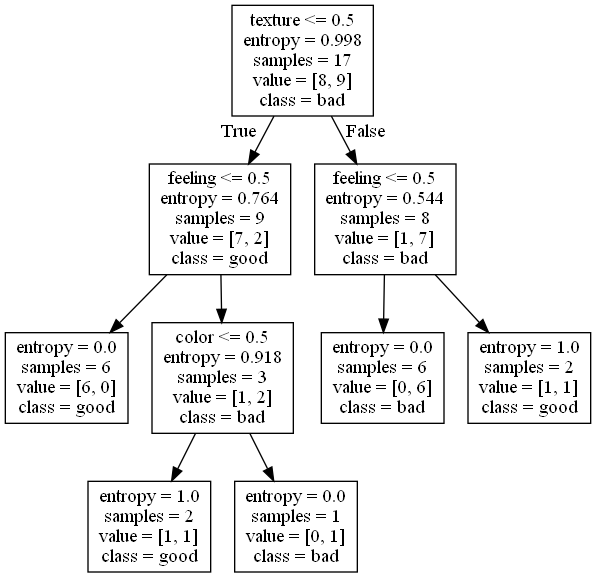

In [22]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image


dot_data = StringIO()
export_graphviz(model,out_file=dot_data,
               feature_names=['color','root','sound','texture','navel','feeling'],\
               class_names=['good','bad'])
graph = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) #在jupyter中直接显示
#graph.write_pdf("tree.pdf")

## 3、随机森林

In [23]:
'''
n_estimators:森林中树木的数量，默认值为10
'''

'\nn_estimators:森林中树木的数量，默认值为10\n'

In [24]:
df = read_csv("pima_data.csv",header=None)
data = df.values
X=data[:,:-1]
y=data[:,-1]

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=4)
rfc = RandomForestClassifier(n_estimators=25)
rfc.fit(X_train,y_train)
y_predict = rfc.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.7532467532467533


D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict

In [26]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble.forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators='warn', criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators